In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os
sys.path.insert(1, 'C:\\Users\\kid\\SynologyDrive\\Lab2023\\KIDs\\QTLab2324\\IRdetection\\Instruments\\Gas_Handler22')
sys.path.insert(2, 'C:\\Users\\kid\\SynologyDrive\\Lab2023\\KIDs\\QTLab2324\\IRdetection\\Instruments\\VNA_GUI')
import handler as h
import HP8753E as hp

In [2]:
frigo = h.FridgeHandler()
vna = hp.HP8753E()

Creating the object
Cryo handler object created correctly!

Creating the object
VNA object created correctly!

Default number of points for a sweep: 1601


In [3]:
Temp = 30

In [4]:
frigo.set_mixc_temp(Temp)

In [5]:
time.sleep(1200)

In [12]:
vna.autoscale()
vna.set_params(pw = -40, bw = 600, pt = 1601, center = 5.347e9, span = 2e7)
vna.set_save_path("C:\\Users\\kid\\SynologyDrive\\Lab2023\\KIDs\\QTLab2324\\IRdetection\\Instruments\\Test_data\\Power-sweep\\")

T = 30...Remaining: 28...
T = 30...Remaining: 27...
T = 30...Remaining: 26...
T = 30...Remaining: 25...
T = 30...Remaining: 24...
T = 30...Remaining: 23...
T = 30...Remaining: 22...
T = 30...Remaining: 21...
T = 30...Remaining: 20...
T = 30...Remaining: 19...
T = 30...Remaining: 18...
T = 30...Remaining: 17...
T = 30...Remaining: 16...
T = 30...Remaining: 15...
T = 30...Remaining: 14...
T = 30...Remaining: 13...
T = 30...Remaining: 12...
T = 30...Remaining: 11...
T = 30...Remaining: 10...
T = 30...Remaining: 9...
T = 30...Remaining: 8...


C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IRdetection\Instruments\VNA_GUI\HP8753E.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,8))


T = 30...Remaining: 7...
T = 30...Remaining: 6...
T = 30...Remaining: 5...
T = 30...Remaining: 4...
T = 30...Remaining: 3...
T = 30...Remaining: 2...
T = 30...Remaining: 1...


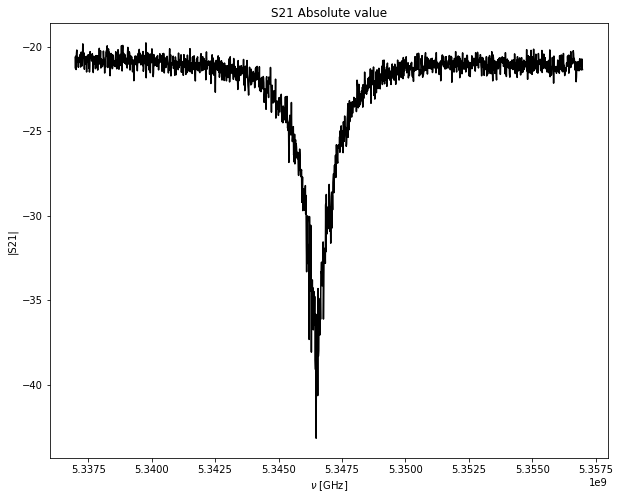

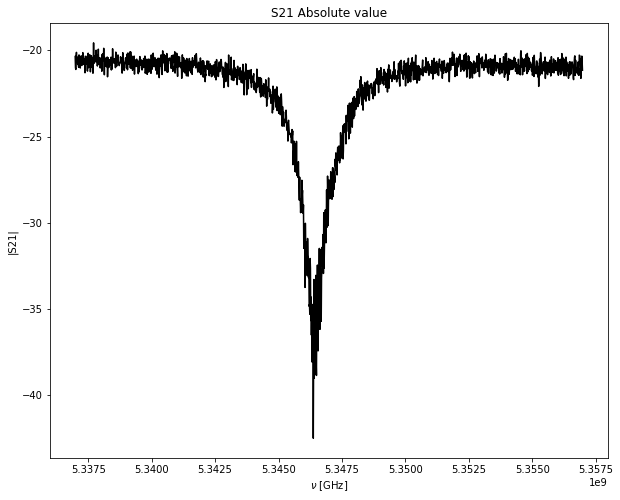

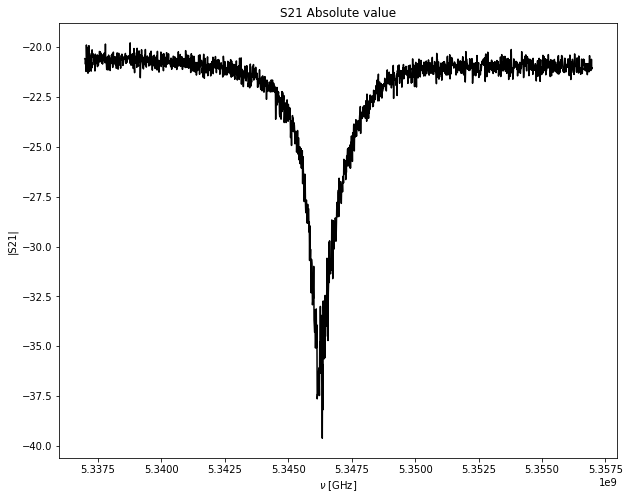

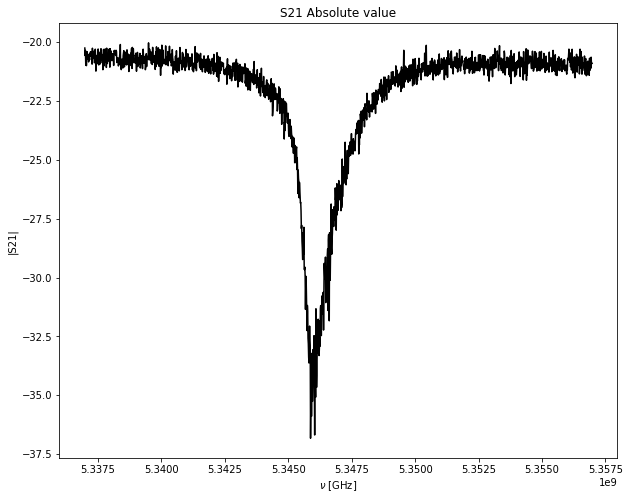

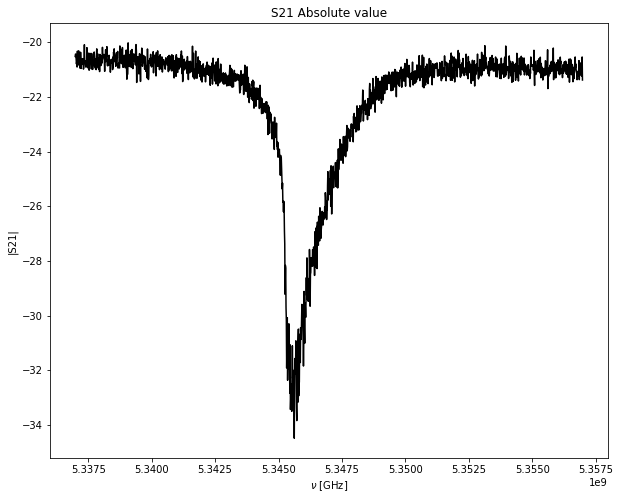

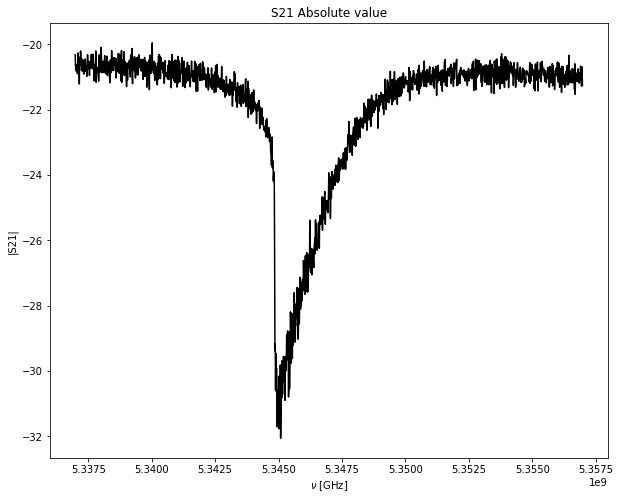

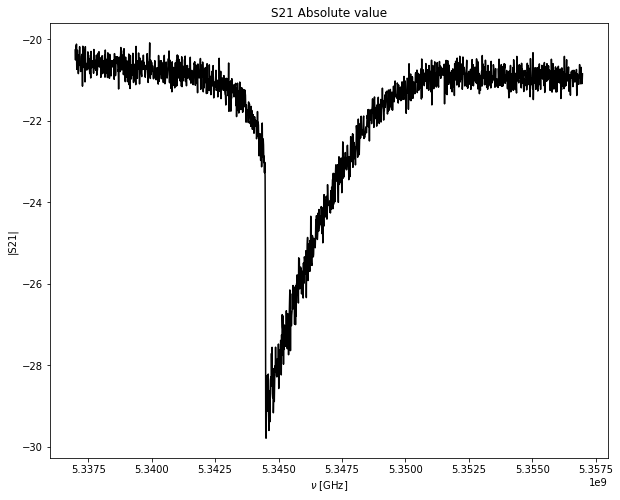

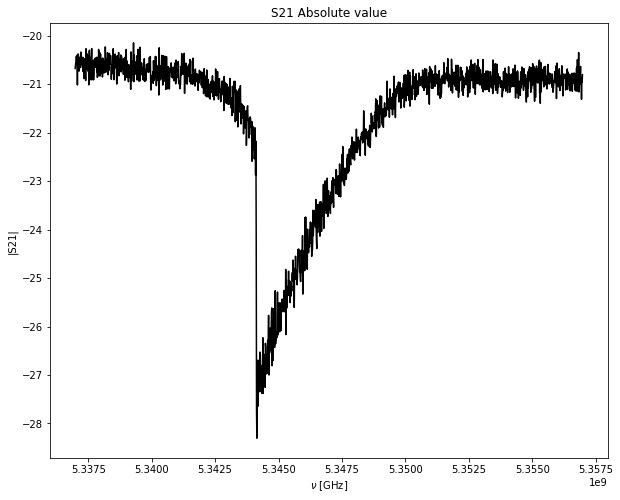

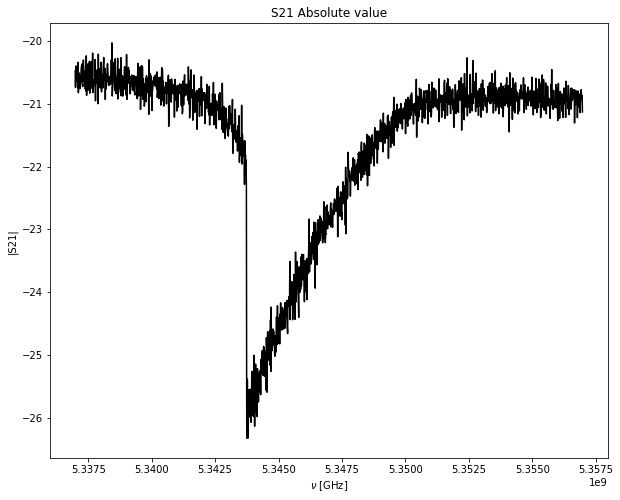

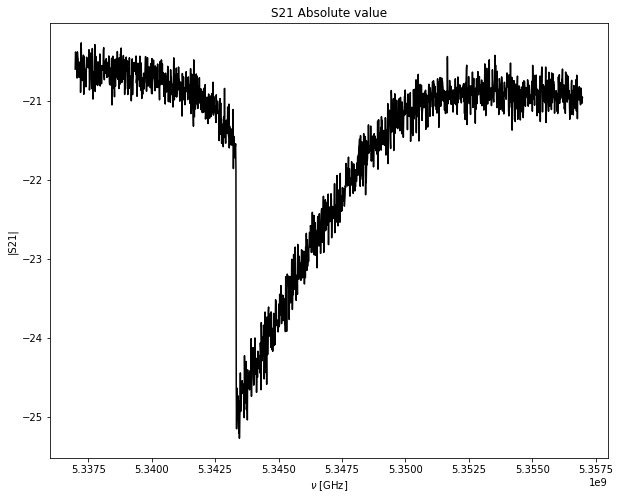

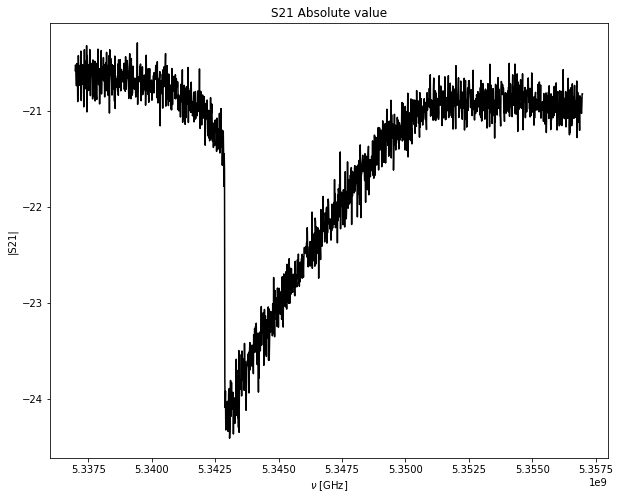

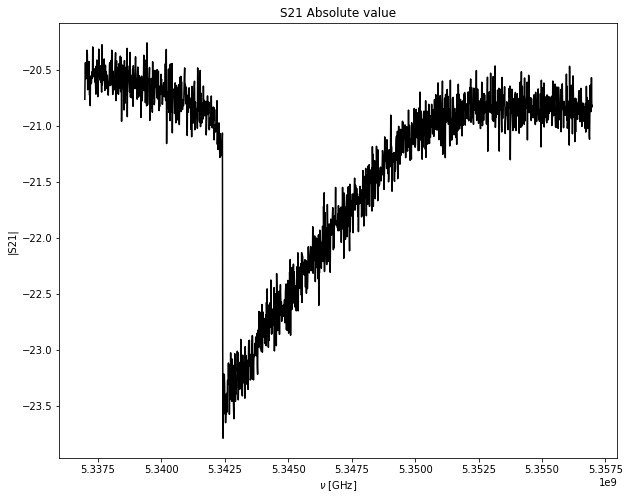

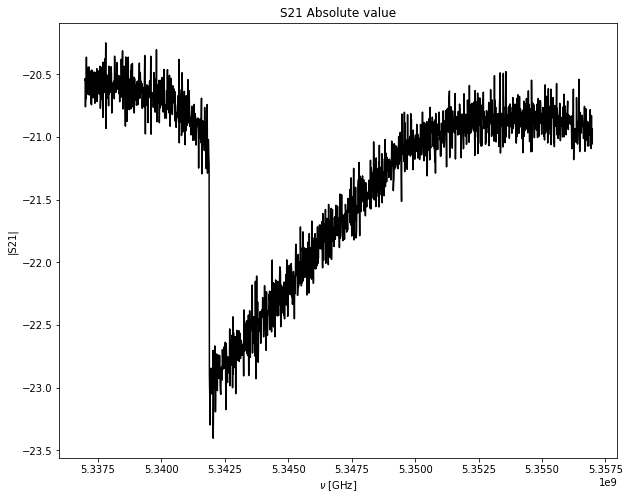

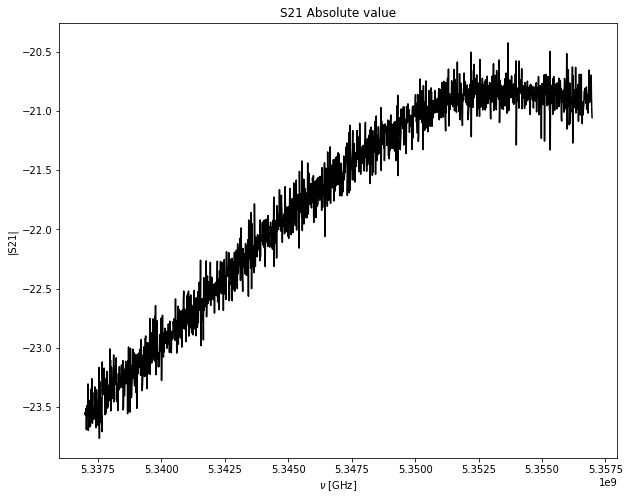

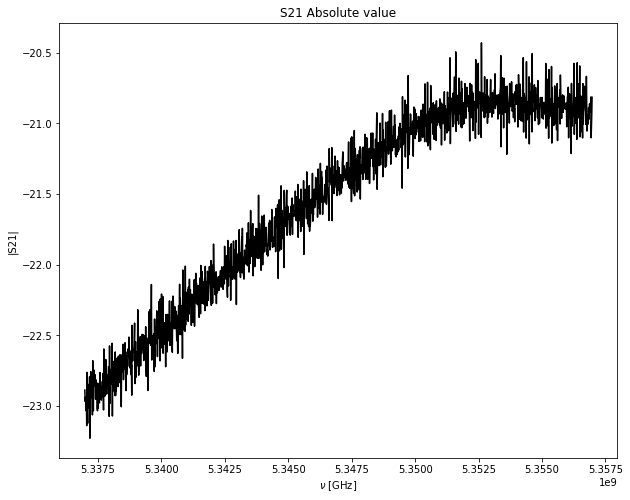

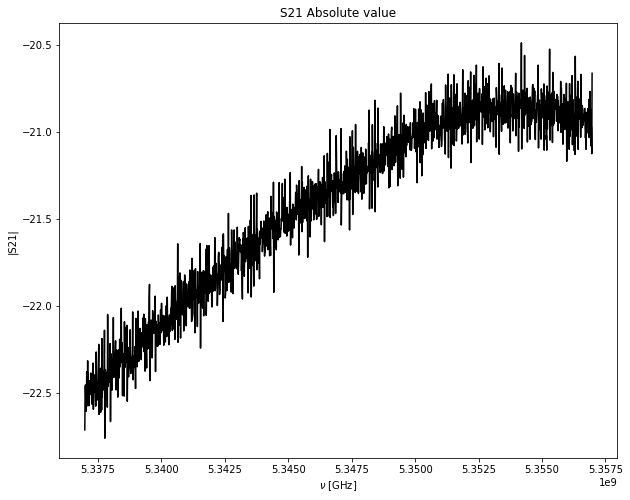

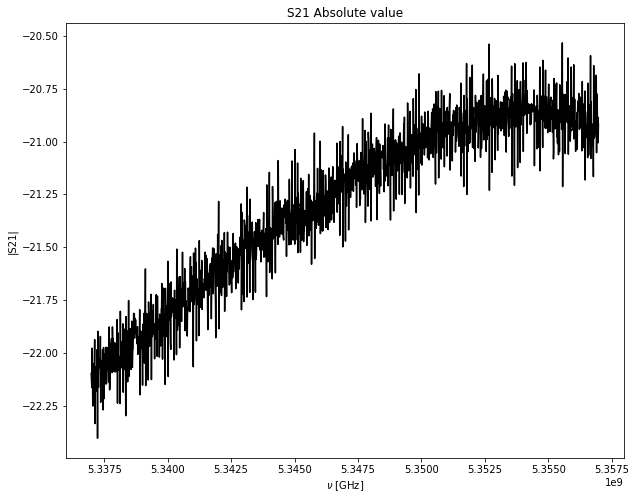

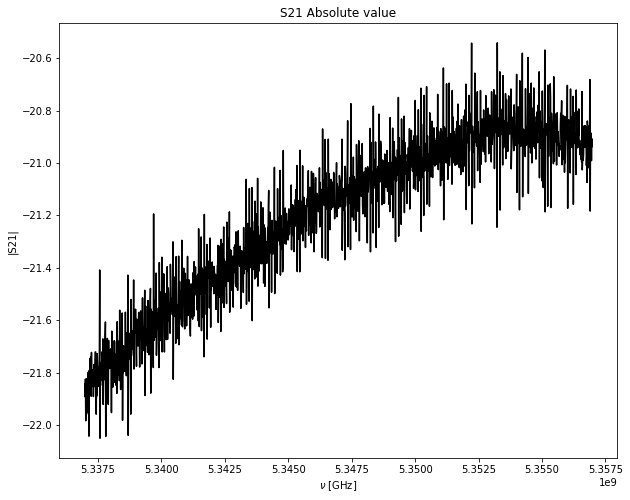

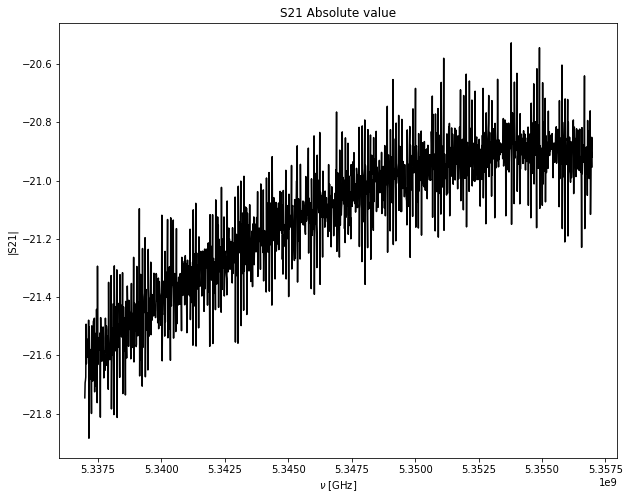

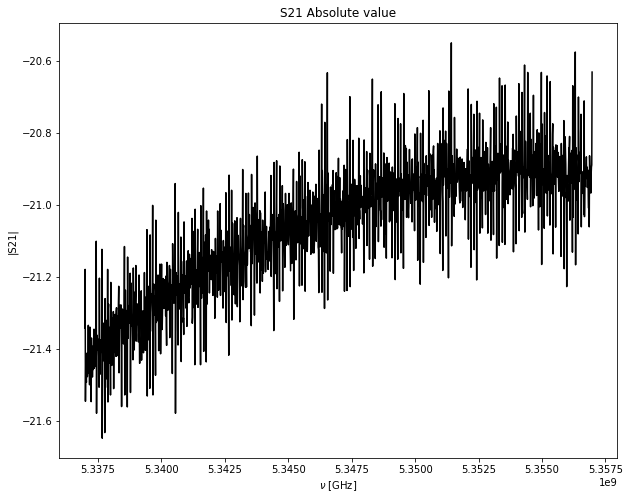

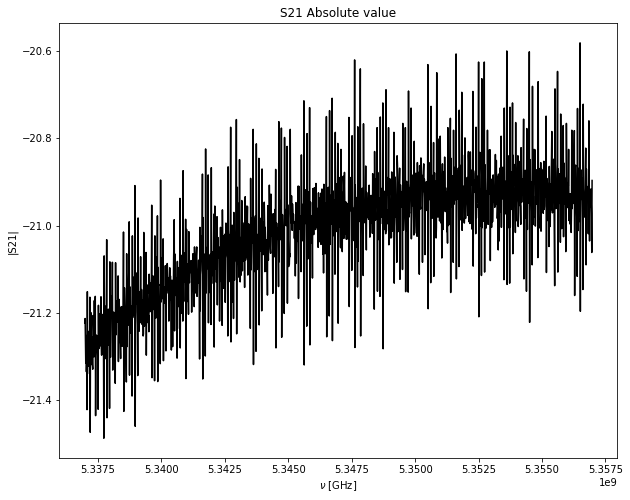

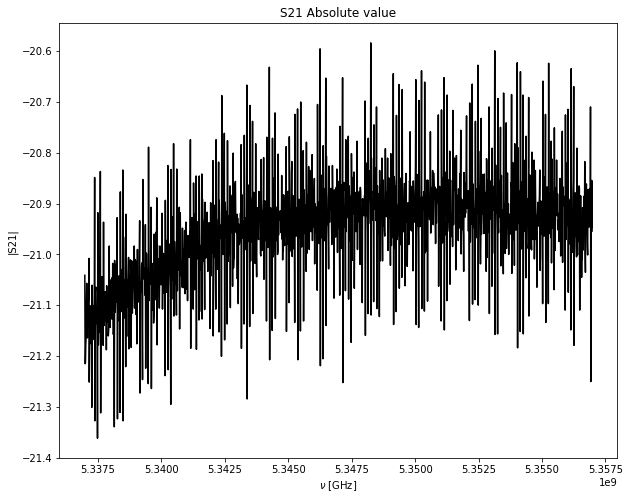

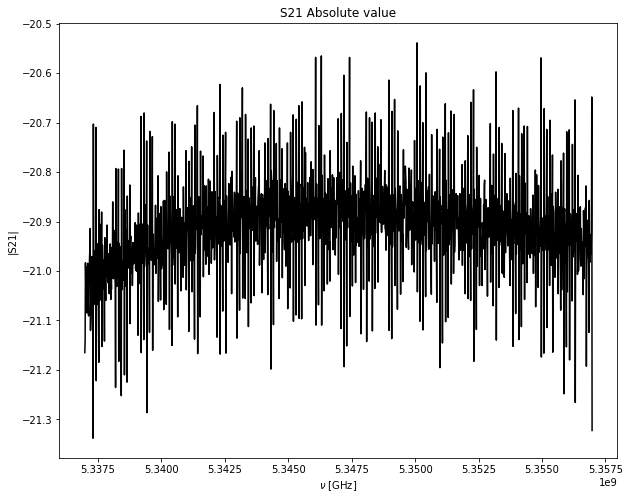

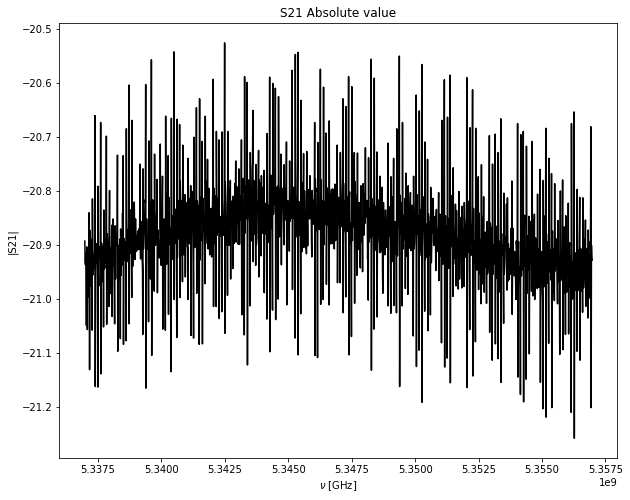

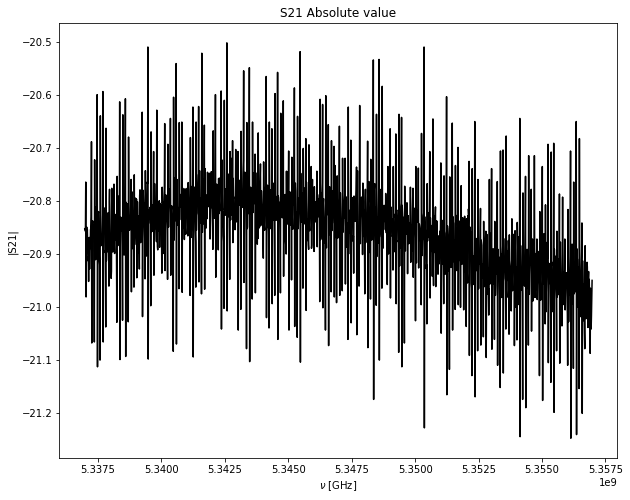

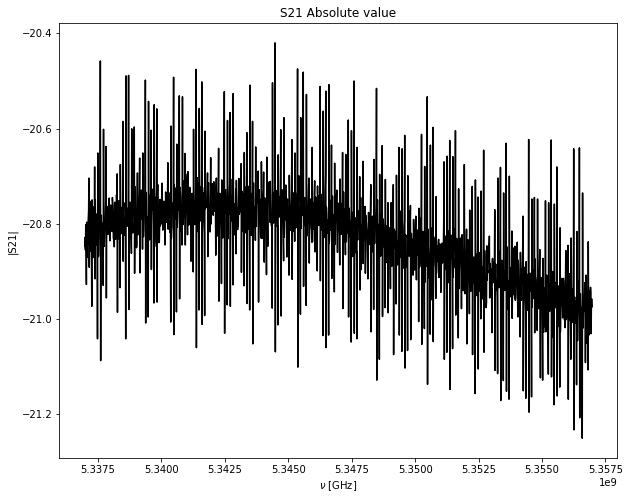

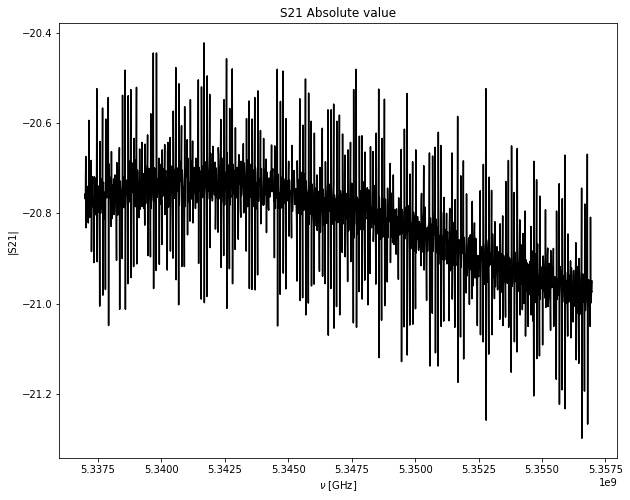

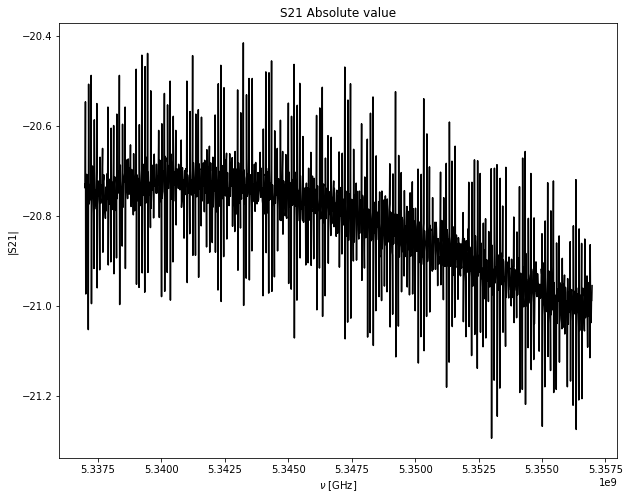

In [14]:
parent_dir = "C:\\Users\\kid\\SynologyDrive\\Lab2023\\KIDs\\QTLab2324\\IRdetection\\Instruments\\Test_data\\Power-sweep\\"
pows = np.arange(-40,-12,1)
data = []
directory = 'T_'+str(Temp)
path = os.path.join(parent_dir, directory) 
os.mkdir(path) 
vna.set_save_path(parent_dir+directory+'\\')
vna.set_T(Temp)
for (j,pow) in enumerate(pows):
    print('T = '+str(Temp)+'...Remaining: '+str(len(pows)-j)+'...')
    vna.set_power(pow)
    vna.autoscale()
    s21, f = vna.get_S21F()
    data.append(s21)
    vna.create_run_s21(j+1, s21, f)

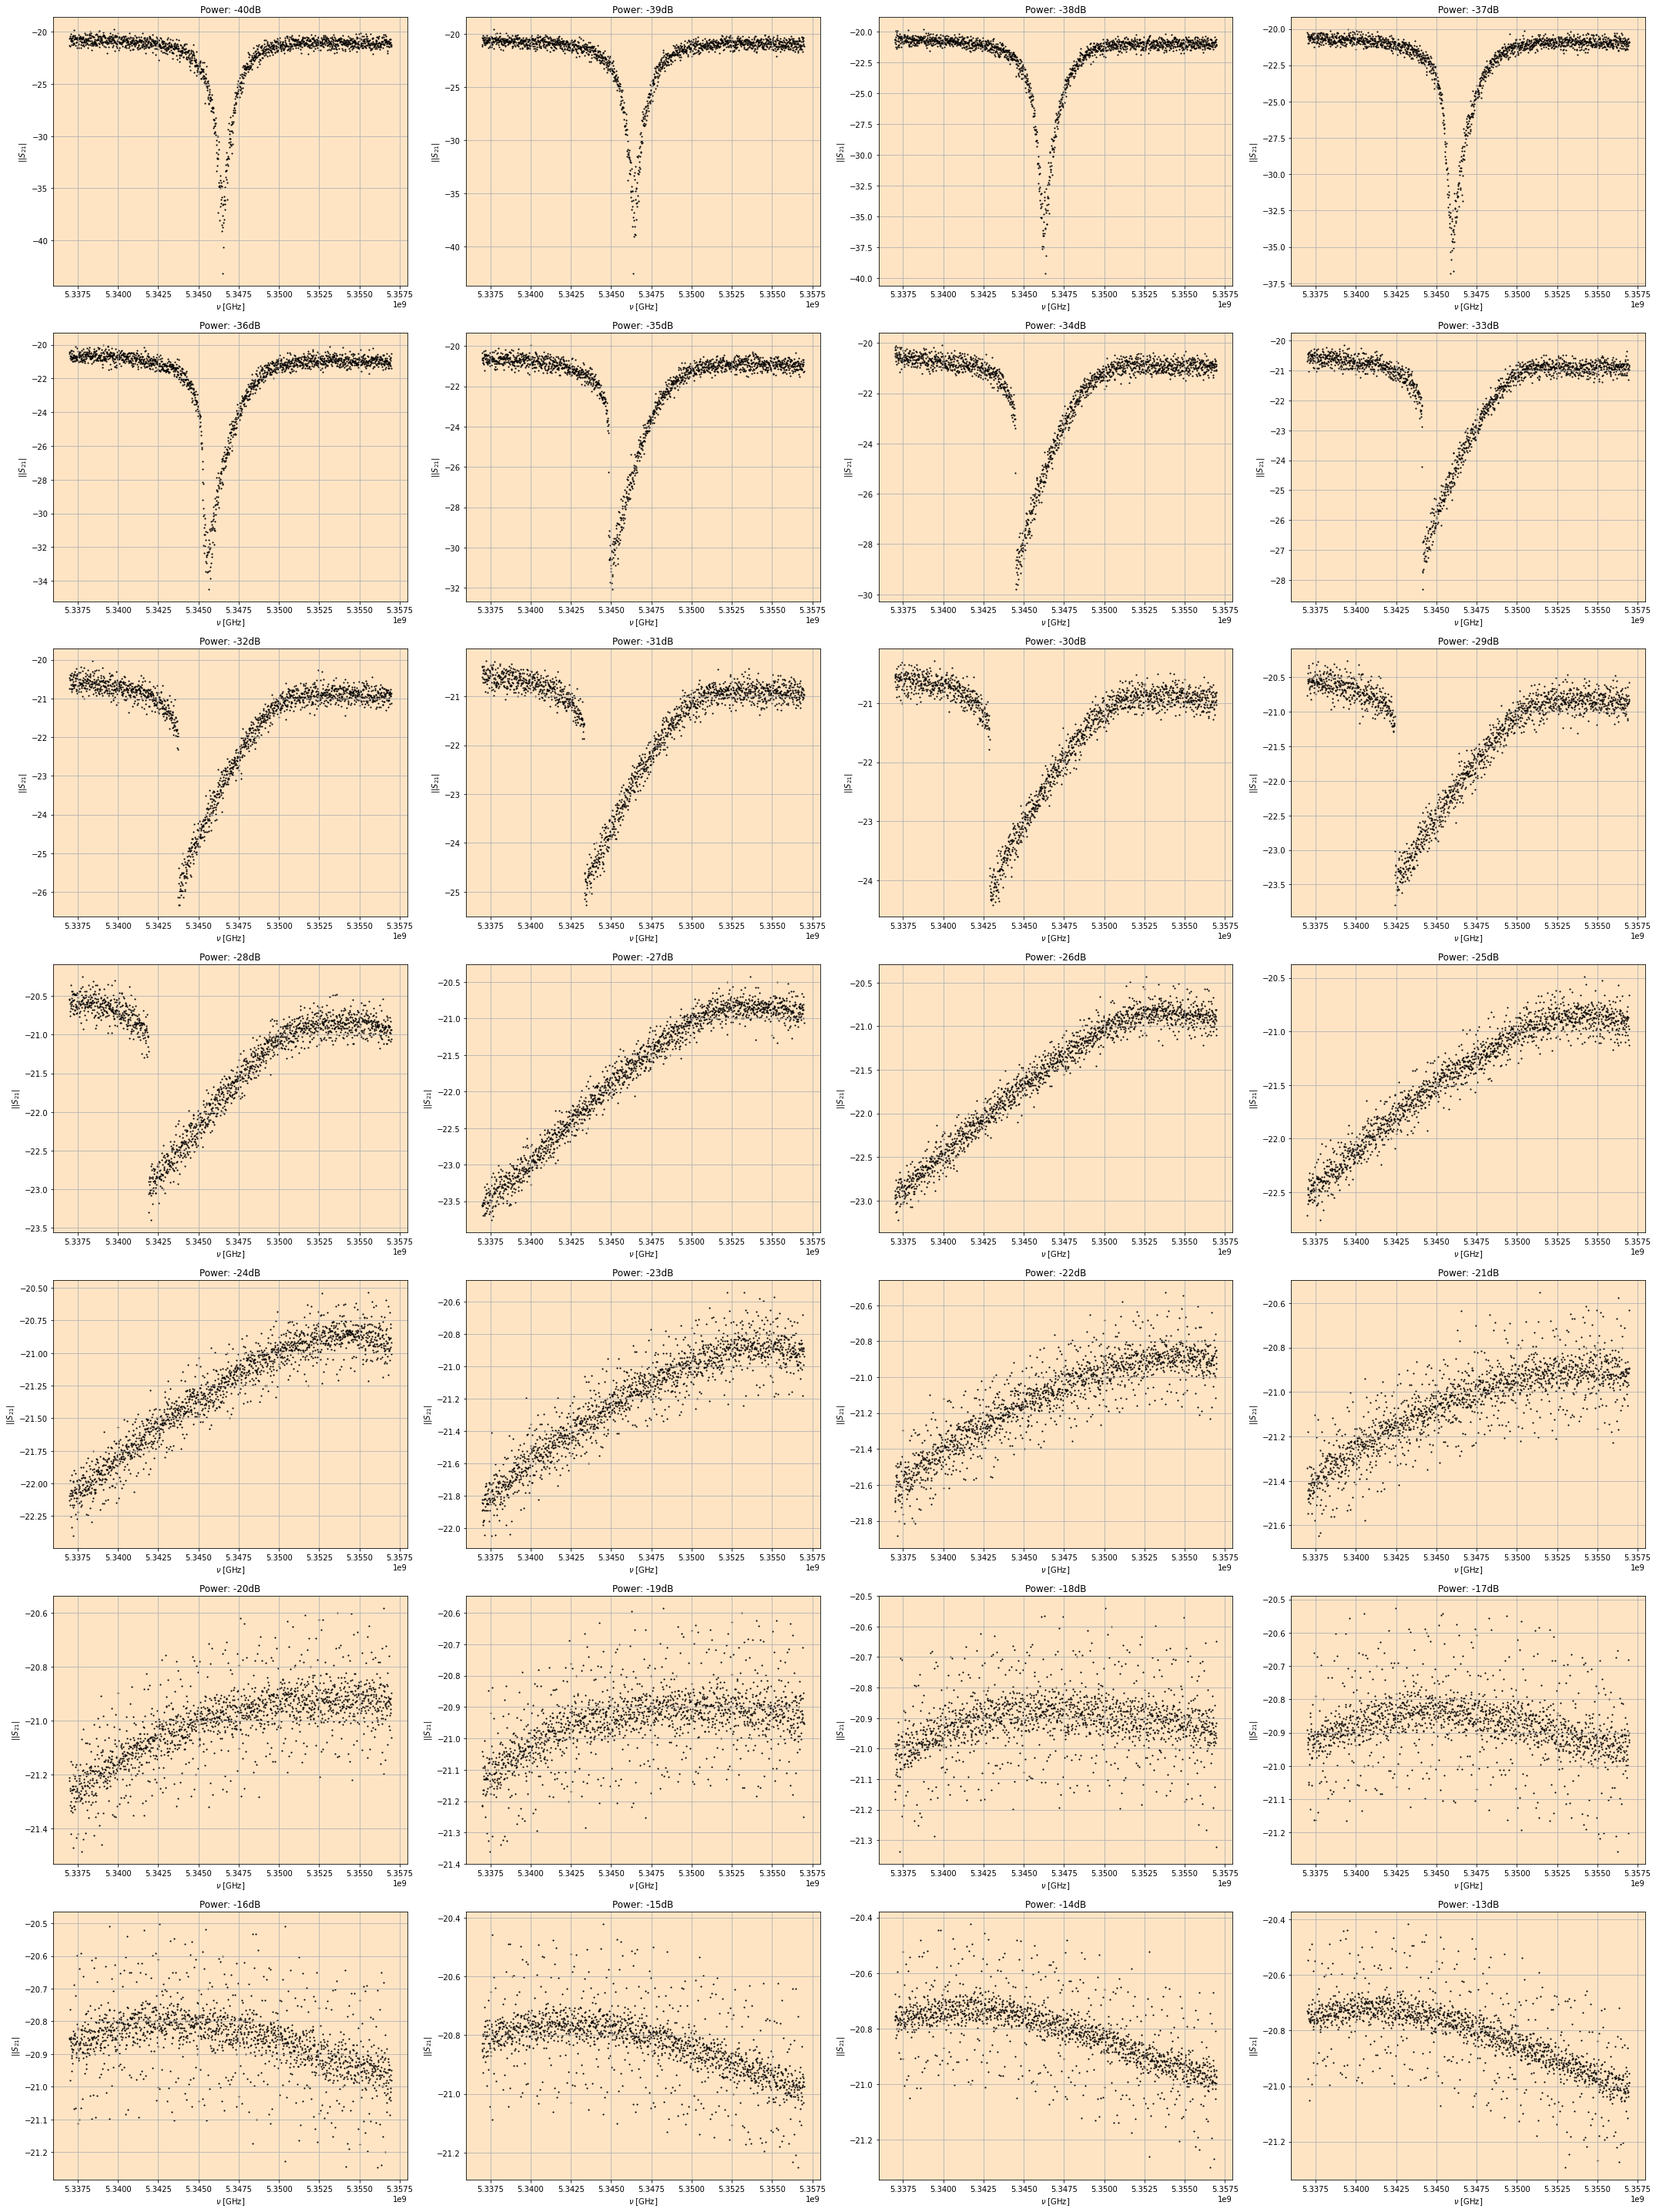

In [15]:
rows = 7
columns = int(len(pows)/rows)

fig, ax = plt.subplots(rows, columns, figsize=(30,40))

for row in range(rows):
    for col in range(columns):
        ax[row][col].scatter(f, data[row*columns+col], marker='.', s=5, color='black')
        ax[row][col].set_title('Power: '+str(pows[row*columns+col])+'dB')
        ax[row][col].grid()
        ax[row][col].set_facecolor('bisque')
        ax[row][col].set_xlabel(r'$\nu$ [GHz]')
        ax[row][col].set_ylabel(r'$||S_{21}|$')
fig.tight_layout()

In [16]:
fig.savefig('T_'+str(Temp)+'.png')